In [42]:
import pandas as pd
import datetime as dt
from glob import glob
from game_log import load_current_line
import matplotlib.pyplot as plt

In [43]:
today = dt.datetime.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'


pp_path = f'Lines/pp/pp_{today_str}.csv'
unabated_path = f'Lines/unabated/unabated_{today_str}.csv'

pp_lines = load_current_line(pp_path,'prop_id','time','date')
unabated = load_current_line(unabated_path,'prop_id','time','event_time')

In [44]:
events = glob('pbp/pbp_events/*')

In [45]:
df = pd.DataFrame()
for event in events:
    new = pd.read_csv(event,index_col=0)
    if df.empty:
        df = new
    else:
        df = pd.concat((df,new))
df

,game_id,eventnum,player_id,player_name,lineup,stat_type,stat_value
0,22200001,7.0,203954,Joel Embiid,"('201143', '203935', '1627759', '1628369', '16...",FGA,1.0
1,22200001,7.0,1627759,Jaylen Brown,"('201143', '203935', '1627759', '1628369', '16...",BLK,1.0
2,22200001,10.0,200782,P.J. Tucker,"('201143', '203935', '1627759', '1628369', '16...",TOV,1.0
3,22200001,11.0,203935,Marcus Smart,"('201143', '203935', '1627759', '1628369', '16...",PTS,2.0
4,22200001,11.0,203935,Marcus Smart,"('201143', '203935', '1627759', '1628369', '16...",FGA,1.0
...,...,...,...,...,...,...,...
689,22300144,NaN,1628991,Jaren Jackson Jr.,"('1628991', '1630217', '1630533', '1630583', '...",sec,16.0
690,22300144,NaN,1630217,Desmond Bane,"('1628991', '1630217', '1630533', '1630583', '...",sec,16.0
691,22300144,NaN,1630533,Ziaire Williams,"('1628991', '1630217', '1630533', '1630583', '...",sec,16.0
692,22300144,NaN,1630583,Santi Aldama,"('1628991', '1630217', '1630533', '1630583', '...",sec,16.0


In [46]:
df.to_csv('pbp/pbp_events/events_all.csv')

In [52]:
steph =df.loc[df.player_name=='Stephen Curry'].reset_index(drop=True)
steph.sample(3)

,game_id,eventnum,player_id,player_name,lineup,stat_type,stat_value
5749,22200220,7.0,201939,Stephen Curry,"('1626164', '1626166', '1628470', '1628969', '...",AST,1.0
1454,22200291,429.0,201939,Stephen Curry,"('203085', '203937', '1626156', '1626157', '16...",AST,1.0
8842,22201187,NaN,201939,Stephen Curry,"('201939', '203110', '1626172', '1629673', '16...",sec,215.0


In [53]:
steph

,game_id,eventnum,player_id,player_name,lineup,stat_type,stat_value
0,22200002,27.0,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1626...",STL,1.0
1,22200002,54.0,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1626...",PTS,1.0
2,22200002,54.0,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1626...",FTA,1.0
3,22200002,55.0,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1626...",PTS,1.0
4,22200002,55.0,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1626...",FTA,1.0
...,...,...,...,...,...,...,...
9481,22300142,NaN,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1627...",sec,68.0
9482,22300142,NaN,201939,Stephen Curry,"('101108', '201939', '202691', '203967', '1631...",sec,65.0
9483,22300142,NaN,201939,Stephen Curry,"('101108', '201939', '203967', '1627780', '163...",sec,41.0
9484,22300142,NaN,201939,Stephen Curry,"('101108', '201939', '203967', '1627780', '163...",sec,41.0


In [54]:
steph.loc[(steph.stat_type =='3PA') | (steph.stat_value==3)]
steph['make'] = 0
steph.loc[steph['stat_value'] == 3, 'make'] = 1

In [55]:
steph.loc[steph.make==1]

,game_id,eventnum,player_id,player_name,lineup,stat_type,stat_value,make
52,22200002,525.0,201939,Stephen Curry,"('201939', '203210', '203952', '1626172', '162...",PTS,3.0,1
55,22200002,535.0,201939,Stephen Curry,"('201939', '203210', '203952', '1626172', '162...",PTS,3.0,1
67,22200002,721.0,201939,Stephen Curry,"('201939', '203210', '203952', '1626172', '162...",PTS,3.0,1
72,22200002,728.0,201939,Stephen Curry,"('201939', '203210', '203952', '1626172', '162...",PTS,3.0,1
94,22200026,28.0,201939,Stephen Curry,"('201939', '202691', '203110', '203952', '1626...",PTS,3.0,1
...,...,...,...,...,...,...,...,...
9428,22300142,99.0,201939,Stephen Curry,"('202684', '1627747', '1627777', '1628378', '1...",PTS,3.0,1
9438,22300142,288.0,201939,Stephen Curry,"('1627747', '1628378', '1628386', '1629622', '...",PTS,3.0,1
9446,22300142,402.0,201939,Stephen Curry,"('1628378', '1628386', '1629622', '1629636', '...",PTS,3.0,1
9456,22300142,455.0,201939,Stephen Curry,"('1627747', '1627777', '1628378', '1629622', '...",PTS,3.0,1


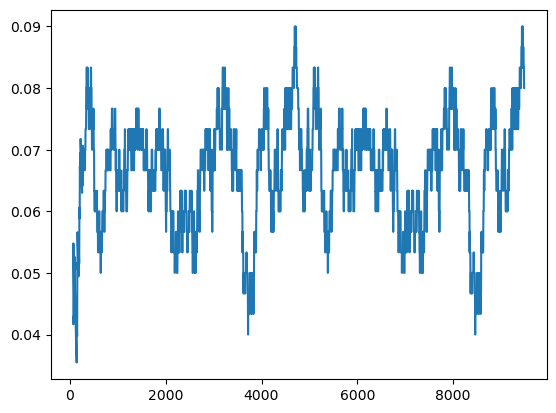

In [64]:
plt.plot(steph.make.rolling(300,min_periods=70).mean())